In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style='darkgrid')

# Type Well

In [3]:
file = 'data/Probabilisticobase.xlsm'
df_pt = pd.read_excel(file, sheet_name='PT', header=3) #, index_col='# Mes')
df_pt.rename(columns={'Qo(Bbl)': 'qo_bbl', '# Mes': 'month'}, inplace=True)
df_pt

,month,qo_bbl
0,0.0,0.000000
1,1.0,408.200000
2,2.0,355.925601
3,3.0,316.855767
4,4.0,286.420655
...,...,...
313,313.0,6.185727
314,314.0,6.131889
315,315.0,6.078520
316,316.0,6.025616


In [4]:
df_pt.describe()

,month,qo_bbl
count,318.000000,318.000000
mean,158.500000,41.453279
std,91.942917,53.363289
min,0.000000,0.000000
25%,79.250000,11.838019
50%,158.500000,23.667228
75%,237.750000,47.346988
max,317.000000,408.200000


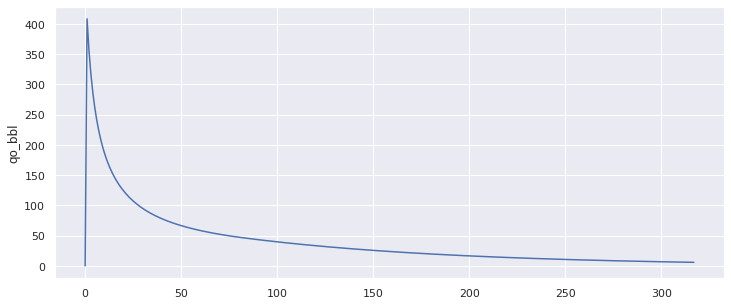

In [5]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_pt.qo_bbl)
plt.show()

### Apply multiplier to qo_type_well

In [6]:
pt_mult = [1, 0.85, 1.25]

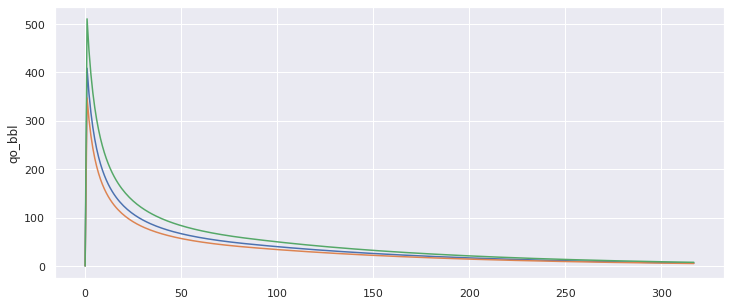

In [7]:
plt.figure(figsize=(12, 5))
for pt in pt_mult:
    sns.lineplot(x=df_pt.index, y=df_pt.qo_bbl.map(lambda x: x*pt))
    ax = plt.gca()
    # ax.legend(labels = pt)  # TODO

### Change tie_in month

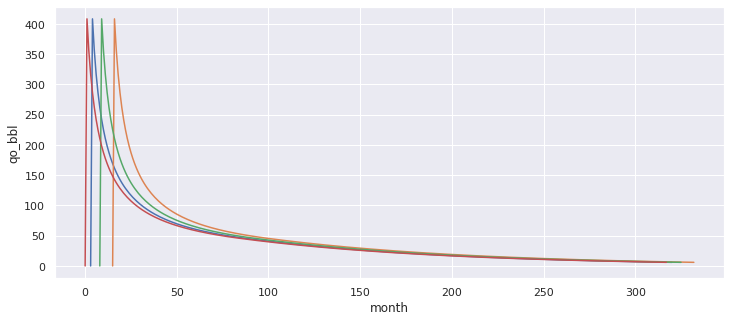

In [35]:
pt_time_disp = [3, 15, 8, 0]
plt.figure(figsize=(12, 5))
# ffd_df = pd.
for tie_in in pt_time_disp:
    sns.lineplot(x=df_pt.month.map(lambda x: x + tie_in), y=df_pt.qo_bbl)
    ax = plt.gca()

In [36]:
df_pt

,month,qo_bbl
0,0.0,0.000000
1,1.0,408.200000
2,2.0,355.925601
3,3.0,316.855767
4,4.0,286.420655
...,...,...
313,313.0,6.185727
314,314.0,6.131889
315,315.0,6.078520
316,316.0,6.025616


In [70]:
pt_time_disp = [3, 15, 8, 0]
ex_months = df_pt.shape[0] + max(pt_time_disp)
ex_wells = len(pt_time_disp)

ffd_df = pd.DataFrame(np.zeros((ex_months, 2)), columns=df_pt.columns)

for tie_in in pt_time_disp:
    tie_in_df = pd.DataFrame(np.zeros((ex_months, 2)), columns=df_pt.columns)
    tie_in_df.month = df_pt.month
    tie_in_df.month = tie_in_df.month.map(lambda x: x + tie_in)
    tie_in_df.qo_bbl = df_pt.qo_bbl
    tie_in_df.set_index(tie_in_df.month, inplace=True)
    
    ffd_df.join(tie_in_df, how='outer', on=ffd_df['month'])

ValueError: columns overlap but no suffix specified: Index(['month', 'qo_bbl'], dtype='object')